In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import networkx as nx

### QUIZ 1 - Shapefile
A shapefile actually consists of three files with different extensions. Each of these contains different information about the objects that are in the file. Which file contains a dataset containing information about the shapes? Write the file extension (three letters, with or without the leading dot, e.g. "txt" or ".txt").

**Answer:**
To clarify, a shapefile is typically composed of three files with the following extensions:

1. ".shp" - This file contains the geometry (shapes) data, such as points, lines, or polygons.
2. ".shx" - This is the index file that stores the index data, which allows for faster access to features in the ".shp" file.
3. ".dbf" - This is the attribute data file that contains information about the attributes or properties associated with each shape in the shapefile.

So, the correct answer to your initial question is "**.dbf**". It contains the dataset containing information about the shapes in the shapefile. Thank you for pointing that out!

### QUIZ 2 - Choice of Algorithms
Which of the following algorithms best matches the following description? "Given a set of points P and a number k, the algorithm separates the points into k different clusters. Each point from P is assigned a unique cluster." Fun side note: All these algorithms start with "k" and are related to spatial data processing :)
- kernel density estimation
- kriging
- k-means
- k nearest neighbors
- k-dimensional trees (k-d trees)

**Answer:** The algorithm that best matches the given description "Given a set of points P and a number k, the algorithm separates the points into k different clusters. Each point from P is assigned a unique cluster." is **k-means**.

The other algorithms mentioned are also related to spatial data processing, but they serve different purposes:

*Kernel density estimation* is a method used to estimate the probability density function of a continuous random variable based on a set of data points. It is used for smoothing and visualizing spatial data.

*Kriging* is a geostatistical interpolation technique used to estimate values at unmeasured locations based on spatial autocorrelation in the observed data.

*K nearest neighbors* is a classification and regression algorithm that assigns a label or predicts a value based on the k-nearest data points in the feature space.

*K-dimensional trees (k-d trees)* are a data structure used for efficient spatial search queries, like finding nearest neighbors or range searches in k-dimensional spaces.

But for the given description, **k-means** is the best match as it explicitly focuses on clustering points into k different clusters.

### QUIZ 3 - Coordinate Conversion, Part 1
Your task is to draw a map of Bulgatia. On it, you need to draw a dot where Sofia is, using the coordinates given in the variable "sofia". What is the value of the first parameter marked by an ellipsis?

sofia = {"lat": 42.6977, "lng": 23.3219}

point = Point(... , ...)

In [3]:
sofia = {"lat": 42.6977, "lng": 23.3219}
point = Point(sofia["lng"], sofia["lat"])

**Answer:**
So the correct answer is **sofia["lng"]** which is 23.3219.

### QUIZ 3 - Coordinate Conversion, Part 2
What is the value of the second parameter?


**Answer:**
So the correct answer is **sofia["lat"]** which is 42.6977.

### QUIZ 4 - Geopandas Capabilities
We can use geopandas to plot objects on any spherical surface, not only Earth's.

- False
- True

**Answer:** **False**.

Geopandas is a Python library built on top of other libraries such as Pandas, Shapely, Fiona, and Matplotlib. While it is a powerful tool for working with geospatial data, its primary focus is on working with geometric objects on Earth's two-dimensional surface, commonly represented by latitude and longitude coordinates. Geopandas is used for spatial data analysis, visualization, and manipulation, mainly for Earth-related geographic information.

It does not have native support for projecting or plotting objects on any arbitrary spherical surface, as that would require specialized transformations and coordinate systems beyond the scope of Earth's geospatial data. For working with objects on different celestial bodies or arbitrary spherical surfaces, specialized tools and libraries are required.

### QUIZ 5 - Florentine Families
One famous graph in social network analysis is the "Florentine families" graph. It is implemented by default in networkx. Each node represents a family, each edge - a marital relationship (i.e. someone from family A married someone from family B). Since marriage is mutual (at least, it should be :D), the graph is undirected. Load it (and visualize it if you want). How many nodes does the shortest path from Pazzi to Peruzzi contain, including the starting and the final one?

In [4]:
florentine_families = nx.florentine_families_graph()

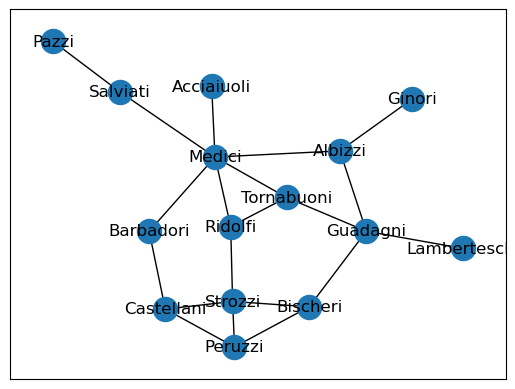

In [5]:
nx.draw_networkx(florentine_families, with_labels=True)
plt.show()

In [6]:
nodes = nx.shortest_path(florentine_families, "Pazzi", "Peruzzi")
print(nodes)

['Pazzi', 'Salviati', 'Medici', 'Barbadori', 'Castellani', 'Peruzzi']


In [7]:
print(len(nodes))

6


How many nodes does the shortest path from Pazzi to Peruzzi contain, including the starting and the final one?

**Answer:** 6 nodes

### QUIZ 6 - A Famous Family
What is the name of the most important / famous family in this graph? Use code to see this, not your imagination :D.

**Answer:** 'Medici'

In [8]:
# Calculate the degree centrality for each node
degree_centrality = nx.degree_centrality(florentine_families)
degree_centrality

{'Acciaiuoli': 0.07142857142857142,
 'Medici': 0.42857142857142855,
 'Castellani': 0.21428571428571427,
 'Peruzzi': 0.21428571428571427,
 'Strozzi': 0.2857142857142857,
 'Barbadori': 0.14285714285714285,
 'Ridolfi': 0.21428571428571427,
 'Tornabuoni': 0.21428571428571427,
 'Albizzi': 0.21428571428571427,
 'Salviati': 0.14285714285714285,
 'Pazzi': 0.07142857142857142,
 'Bischeri': 0.21428571428571427,
 'Guadagni': 0.2857142857142857,
 'Ginori': 0.07142857142857142,
 'Lamberteschi': 0.07142857142857142}

In [9]:
# Find the node with the highest degree centrality (most important/famous family)
most_important_family = max(degree_centrality, key=degree_centrality.get)
most_important_family

'Medici'

### QUIZ 7 - Searching in Graphs
The most popular (and arguably, easiest to implement) algorithms in graphs involve traversing. The problem is stated like this: given a graph G and a starting node S, explore all nodes connected (directly or not) to S. The two most common ways of graph traversal are depth-first search (DFS) and breadth-first search (BFS). You can look them up on the internet. Let's now imagine another problem: finding a shortest path between two nodes. We already saw (many times) how it works. More formally, given a graph G, a start node S, and an end node P, find a path from S to P which has minimal length (i.e. minimal number of edges). We can solve this new problem by adapting one of the previous algorithms. Which traversal algorithm can we adapt to find a shortest path?

    a) DFS
    b) BFS
    c) Both
    d) Neither

**Answer**: b) **BFS**

Breadth-First Search (BFS) is the traversal algorithm that can be adapted to find a shortest path between two nodes in a graph. BFS explores the nodes layer by layer starting from the source node and moves to the neighboring nodes before exploring the next layer. This property of BFS makes it well-suited for finding the shortest path in unweighted graphs since it guarantees that the first time a node is reached, it will be reached by the shortest path.

On the other hand, Depth-First Search (DFS) does not guarantee that the first path found will be the shortest path. It explores as far as possible along each branch before backtracking, which might not necessarily lead to the shortest path.

So, to find a shortest path between two nodes in a graph, we can adapt the **BFS algorithm**.